### Introduction
#### K-Nearest Neighbors Algorithm

L'algorithme des k plus proches voisins, également connu sous le nom de KNN ou k-NN, est un classificateur d'apprentissage supervisé non paramétrique, qui utilise la proximité pour effectuer des classifications ou des prédictions sur le regroupement d'un point de données individuel. Bien qu'il puisse être utilisé pour des problèmes de régression ou de classification, il est généralement utilisé comme algorithme de classification.

Pour les problèmes de classification, une étiquette de classe est attribuée sur la base d'un vote majoritaire, c'est-à-dire l'étiquette la plus fréquemment représentée autour d'un point de données donné est utilisée.

Pour faire une prédiction (étiquette de classe ou cible continue), les algorithmes kNN trouvent le k
voisins les plus proches d'un point de requête et calculer l'étiquette de classe (classification) ou continue
cible (régression) basée sur les k points les plus proches (les plus « similaires »).

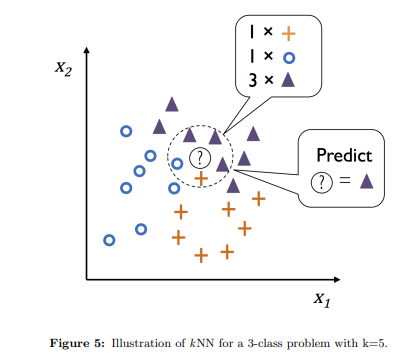

#### Mesures de distance
Il existe de nombreuses métriques ou mesures de distance que nous pouvons utiliser pour sélectionner k voisins les plus proches. Il n'existe pas de « meilleure » mesure de distance, et le choix dépend fortement du contexte ou du problème.

Euclidean Distance:
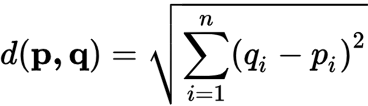

Manhattan Distance:
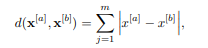

Minkowski distance
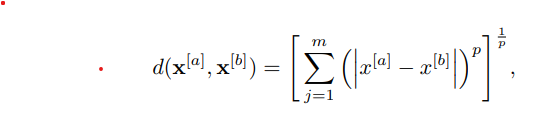

#### Malédiction de dimensionnalité
L'algorithme kNN est particulièrement sensible à la malédiction de la dimensionnalité. En machine learning, la malédiction de la dimensionnalité fait référence à des scénarios avec une taille fixe d'exemples de formation
mais un nombre croissant de dimensions et une plage de valeurs de caractéristiques dans chaque dimension dans un
espace d'entités de grande dimension.

Dans kNN, un nombre croissant de dimensions devient de plus en plus problématique car la
plus nous ajoutons de dimensions, plus le volume dans l'hyperespace doit être grand pour capturer un nombre fixe de voisins.
Au fur et à mesure que le volume augmente, les "voisins" deviennent
de moins en moins « similaires » au point de requête car ils sont maintenant tous relativement éloignés de la requête
point considérant toutes les différentes dimensions qui sont incluses lors du calcul de la paire
distances.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler #z = (x - u) / s

In [2]:
df = pd.read_csv('breast_cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.drop(['Unnamed: 32'],axis=1, inplace=True)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

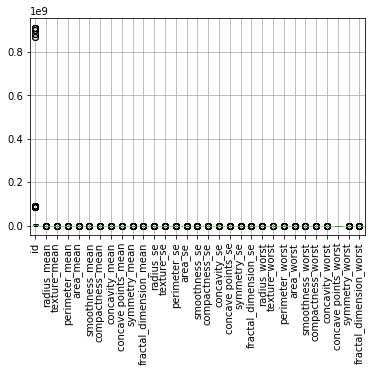

In [8]:
df.boxplot(rot=90)
plt.show()

In [9]:
#Label
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df['diagnosis'] = df['diagnosis'].replace({'B':0, 'M':1})

In [11]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

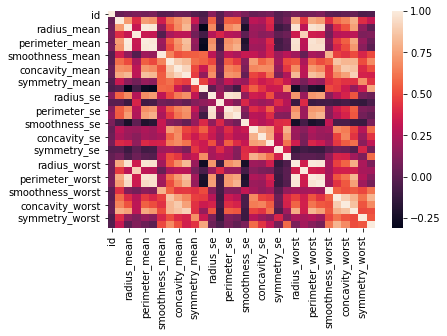

In [12]:
sns.heatmap(df.corr())
plt.show()

In [13]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [14]:
predictors = df.drop(['diagnosis', 'id'], axis=1)
# predictors = df[['', '']]
label = df[['diagnosis']]

In [15]:
list(predictors.columns)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [16]:
predictors.shape

(569, 30)

In [17]:
label.shape

(569, 1)

In [18]:
### Model
X_train, X_test, y_train, y_test = train_test_split(predictors, label, test_size=0.2)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-1.711695e-16,2.540093e-16,4.858141e-16,-1.891039e-16,-4.375011e-16,-1.041902e-16,-8.479176e-17,-1.439630e-16,2.812158e-16,1.177324e-16,...,-1.024821e-16,5.172907e-16,3.184266e-16,-7.661759e-17,-2.974422e-16,1.930080e-16,-4.245688e-17,5.209508e-17,8.249811e-16,-8.442575e-17
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-2.027108e+00,-2.079021e+00,-1.984744e+00,-1.446508e+00,-3.056948e+00,-1.642301e+00,-1.138283e+00,-1.269138e+00,-2.747766e+00,-1.875844e+00,...,-1.738490e+00,-2.161924e+00,-1.715350e+00,-1.232520e+00,-2.658172e+00,-1.458082e+00,-1.328454e+00,-1.745683e+00,-2.177785e+00,-1.582757e+00
25%,-6.808023e-01,-7.213274e-01,-6.825630e-01,-6.609785e-01,-7.351495e-01,-7.324719e-01,-7.514824e-01,-7.328467e-01,-6.613642e-01,-6.738375e-01,...,-6.665410e-01,-7.600459e-01,-6.861393e-01,-6.390759e-01,-7.185305e-01,-6.720616e-01,-7.612425e-01,-7.556060e-01,-6.193318e-01,-6.755518e-01
50%,-2.243062e-01,-9.105447e-02,-2.300646e-01,-3.033470e-01,-3.179665e-02,-1.701391e-01,-3.314935e-01,-3.932700e-01,-6.498743e-02,-1.732440e-01,...,-2.612531e-01,-5.164132e-02,-2.673655e-01,-3.351078e-01,-4.631294e-02,-2.678281e-01,-1.985307e-01,-2.290840e-01,-1.323151e-01,-2.150389e-01
75%,4.826186e-01,5.889769e-01,5.069091e-01,3.468011e-01,6.691104e-01,5.123302e-01,4.822762e-01,5.392164e-01,5.295544e-01,4.845126e-01,...,5.048784e-01,6.385140e-01,5.416400e-01,3.286223e-01,6.128519e-01,5.419441e-01,5.626677e-01,7.096160e-01,4.350593e-01,4.461537e-01
max,4.020105e+00,4.768682e+00,4.033736e+00,5.301121e+00,4.683777e+00,4.736674e+00,4.482641e+00,4.029259e+00,4.518857e+00,5.033510e+00,...,4.210669e+00,3.984772e+00,4.447025e+00,6.138072e+00,3.747692e+00,5.267464e+00,4.521149e+00,2.477308e+00,6.056043e+00,6.834181e+00


In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

/home/intelligencia/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred = knn.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


#### Utilisation de la validation croisée (cross validation) pour obtenir la meilleure valeur de k

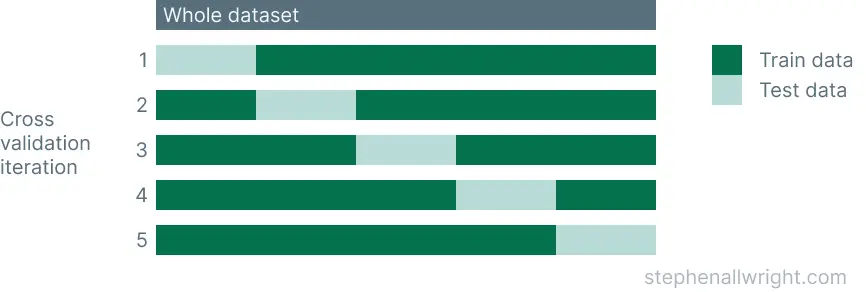

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score,  precision_score, f1_score

In [25]:
k_values = [i for i in range (1,11)]
scores = []

scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, predictors, label, cv=5)
    scores.append(np.mean(score))

/home/intelligencia/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/intelligencia/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/intelligencia/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/intelligencia/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1

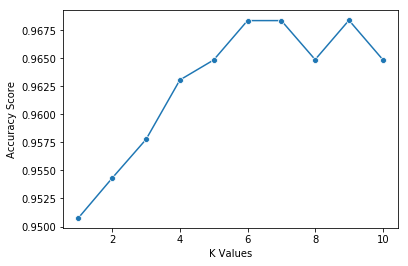

In [26]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

/home/intelligencia/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [38]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) #tp / (tp + fp)
recall = recall_score(y_test, y_pred) #tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("f1_score:", f1)

Accuracy: 0.9385964912280702
Precision: 1.0
Recall: 0.8571428571428571
f1_score: 0.923076923076923


In [39]:
confusion_matrix(y_pred, y_test)

array([[65,  7],
       [ 0, 42]])

In [31]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()

In [32]:
print(scaler.fit(data))

StandardScaler()


In [33]:
print(data)

[[0, 0], [0, 0], [1, 1], [1, 1]]


In [34]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [35]:
print(scaler.transform([[2, 2]]))

[[3. 3.]]
